In [1]:
import os
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 252 samples in 0.000s...
[t-SNE] Computed neighbors for 252 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 252 / 252
[t-SNE] Mean sigma: 4.921700
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.129295
[t-SNE] KL divergence after 300 iterations: 0.505915


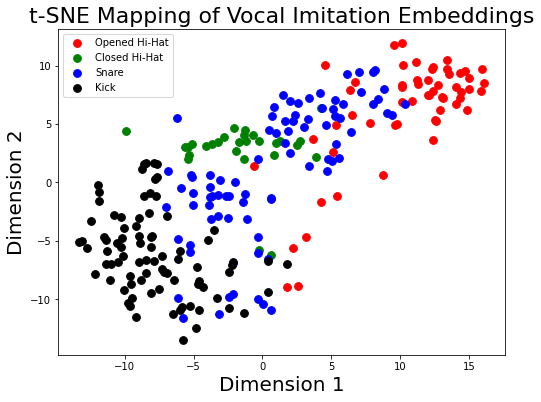

In [2]:
# Check embeddings through t-SNE

embeddings_ref = np.load('../../data/processed/adib_bark/embeddings_ref_adib_bark_0.npy')
embeddings_imi = np.load('../../data/processed/adib_bark/embeddings_imi_adib_bark_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(8,6))
plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend()

In [3]:
reconstructions_ref_0 = np.load('../../data/processed/reconstructions/adib_bark/reconstructions_ref_adib_bark_0.npy')
reconstructions_imi_0 = np.load('../../data/processed/reconstructions/adib_bark/reconstructions_imi_adib_bark_0.npy')
originals_ref_0 = np.load('../../data/processed/reconstructions/adib_bark/originals_ref_adib_bark_0.npy')
originals_imi_0 = np.load('../../data/processed/reconstructions/adib_bark/originals_imi_adib_bark_0.npy')

reconstructions_ref_1 = np.load('../../data/processed/reconstructions/ae_bark/reconstructions_ref_ae_bark_0.npy')
reconstructions_imi_1 = np.load('../../data/processed/reconstructions/ae_bark/reconstructions_imi_ae_bark_0.npy')
originals_ref_1 = np.load('../../data/processed/reconstructions/ae_bark/originals_ref_ae_bark_0.npy')
originals_imi_1 = np.load('../../data/processed/reconstructions/ae_bark/originals_imi_ae_bark_0.npy')

'''reconstructions_ref_2 = np.load('../../data/processed/reconstructions/unsupervised_bark/reconstructions_ref_unsupervised_bark_0.npy')
reconstructions_imi_2 = np.load('../../data/processed/reconstructions/unsupervised_bark/reconstructions_imi_unsupervised_bark_0.npy')
originals_ref_2 = np.load('../../data/processed/reconstructions/unsupervised_bark/originals_ref_unsupervised_bark_0.npy')
originals_imi_2 = np.load('../../data/processed/reconstructions/unsupervised_bark/originals_imi_unsupervised_bark_0.npy')

reconstructions_ref_3 = np.load('../../data/processed/reconstructions/RI_bark/reconstructions_ref_RI_bark_0.npy')
reconstructions_imi_3 = np.load('../../data/processed/reconstructions/RI_bark/reconstructions_imi_RI_bark_0.npy')
originals_ref_3 = np.load('../../data/processed/reconstructions/RI_bark/originals_ref_RI_bark_0.npy')
originals_imi_3 = np.load('../../data/processed/reconstructions/RI_bark/originals_imi_RI_bark_0.npy')

reconstructions_ref_4 = np.load('../../data/processed/reconstructions/KSH_bark/reconstructions_ref_KSH_bark_0.npy')
reconstructions_imi_4 = np.load('../../data/processed/reconstructions/KSH_bark/reconstructions_imi_KSH_bark_0.npy')
originals_ref_4 = np.load('../../data/processed/reconstructions/KSH_bark/originals_ref_KSH_bark_0.npy')
originals_imi_4 = np.load('../../data/processed/reconstructions/KSH_bark/originals_imi_KSH_bark_0.npy')'''

reconstructions_ref_5 = np.load('../../data/processed/reconstructions/RI_KSH_bark/reconstructions_ref_RI_KSH_bark_0.npy')
reconstructions_imi_5 = np.load('../../data/processed/reconstructions/RI_KSH_bark/reconstructions_imi_RI_KSH_bark_0.npy')
originals_ref_5 = np.load('../../data/processed/reconstructions/RI_KSH_bark/originals_ref_RI_KSH_bark_0.npy')
originals_imi_5 = np.load('../../data/processed/reconstructions/RI_KSH_bark/originals_imi_RI_KSH_bark_0.npy')


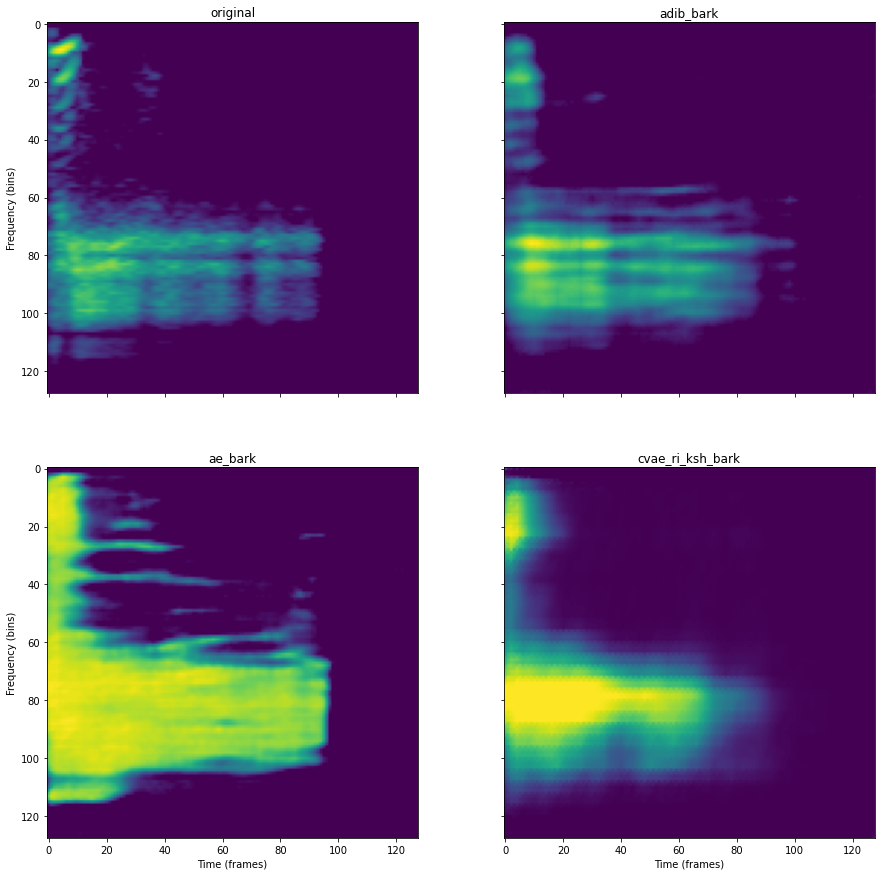

In [25]:
n = 129

'''fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(reconstructions_imi_0[n,:,:,0])
axs[0, 0].set_title('adib_bark')
axs[1, 0].imshow(reconstructions_imi_1[n,:,:,0])
axs[1, 0].set_title('ae_bark')
axs[0, 1].imshow(reconstructions_imi_2[n,:,:,0])
axs[0, 1].set_title('vae_bark')
axs[1, 1].imshow(reconstructions_imi_3[n,:,:,0])
axs[1, 1].set_title('cvae_ri_bark')
axs[0, 2].imshow(reconstructions_imi_4[n,:,:,0])
axs[0, 2].set_title('cvae_ksh_bark')
axs[1, 2].imshow(reconstructions_imi_5[n,:,:,0])
axs[1, 2].set_title('cvae_ri_ksh_bark')
for ax in axs.flat:
    ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
for ax in axs.flat:
    ax.label_outer()'''

fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].imshow(originals_imi_0[n,:,:,0])
axs[0,0].set_title('original')
axs[0,1].imshow(reconstructions_imi_0[n,:,:,0])
axs[0,1].set_title('adib_bark')
axs[1,0].imshow(reconstructions_imi_1[n,:,:,0])
axs[1,0].set_title('ae_bark')
axs[1,1].imshow(reconstructions_imi_5[n,:,:,0])
axs[1,1].set_title('cvae_ri_ksh_bark')
for ax in axs.flat:
    ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
for ax in axs.flat:
    ax.label_outer()

In [2]:
reconstructions_ref_0 = np.load('../../data/processed/reconstructions/adib_bark/reconstructions_ref_adib_bark_0.npy')
reconstructions_imi_0 = np.load('../../data/processed/reconstructions/adib_bark/reconstructions_imi_adib_bark_0.npy')
originals_ref_0 = np.load('../../data/processed/reconstructions/adib_bark/originals_ref_adib_bark_0.npy')
originals_imi_0 = np.load('../../data/processed/reconstructions/adib_bark/originals_imi_adib_bark_0.npy')

reconstructions_ref_1 = np.load('../../data/processed/reconstructions/ae_1/reconstructions_ref_ae_1_0.npy')
reconstructions_imi_1 = np.load('../../data/processed/reconstructions/ae_1/reconstructions_imi_ae_1_0.npy')

reconstructions_ref_2 = np.load('../../data/processed/reconstructions/ae_2/reconstructions_ref_ae_2_0.npy')
reconstructions_imi_2 = np.load('../../data/processed/reconstructions/ae_2/reconstructions_imi_ae_2_0.npy')

reconstructions_ref_3 = np.load('../../data/processed/reconstructions/ae_3/reconstructions_ref_ae_3_0.npy')
reconstructions_imi_3 = np.load('../../data/processed/reconstructions/ae_3/reconstructions_imi_ae_3_0.npy')

reconstructions_ref_4 = np.load('../../data/processed/reconstructions/ae_4/reconstructions_ref_ae_4_0.npy')
reconstructions_imi_4 = np.load('../../data/processed/reconstructions/ae_4/reconstructions_imi_ae_4_0.npy')

reconstructions_ref_5 = np.load('../../data/processed/reconstructions/ae_5/reconstructions_ref_ae_5_0.npy')
reconstructions_imi_5 = np.load('../../data/processed/reconstructions/ae_5/reconstructions_imi_ae_5_0.npy')

reconstructions_ref_6 = np.load('../../data/processed/reconstructions/ae_6/reconstructions_ref_ae_6_0.npy')
reconstructions_imi_6 = np.load('../../data/processed/reconstructions/ae_6/reconstructions_imi_ae_6_0.npy')

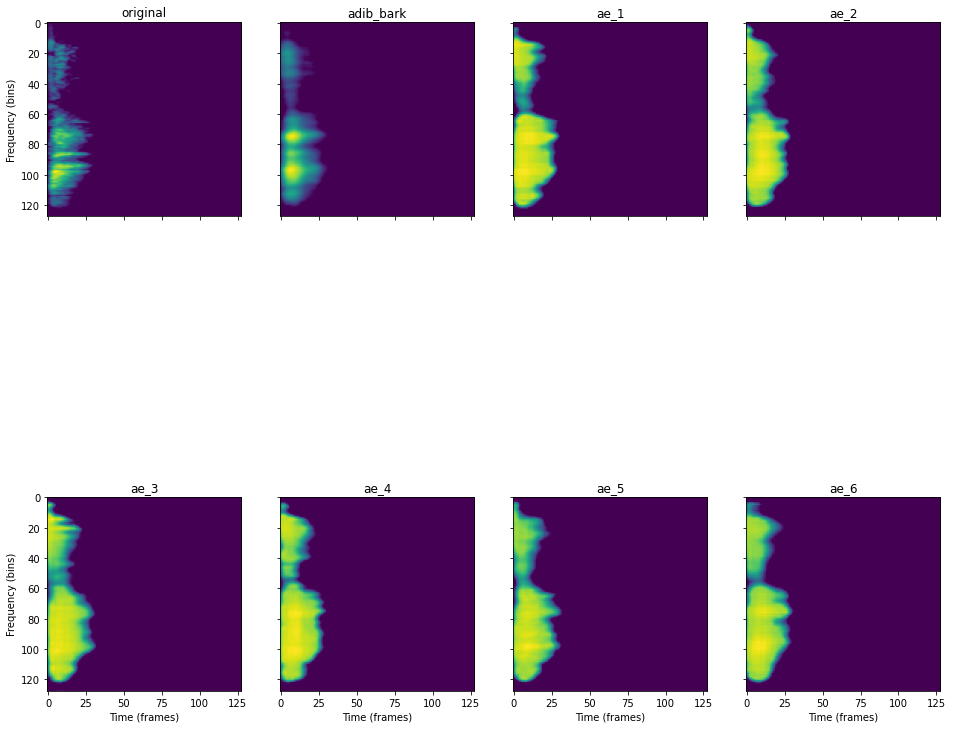

In [4]:
n = 129

fig, axs = plt.subplots(2, 4, figsize=(16,16))
axs[0,0].imshow(originals_imi_0[n,:,:,0])
axs[0,0].set_title('original')
axs[0,1].imshow(reconstructions_imi_0[n,:,:,0])
axs[0,1].set_title('adib_bark')
axs[0,2].imshow(reconstructions_imi_1[n,:,:,0])
axs[0,2].set_title('ae_1')
axs[0,3].imshow(reconstructions_imi_2[n,:,:,0])
axs[0,3].set_title('ae_2')
axs[1,0].imshow(reconstructions_imi_3[n,:,:,0])
axs[1,0].set_title('ae_3')
axs[1,1].imshow(reconstructions_imi_4[n,:,:,0])
axs[1,1].set_title('ae_4')
axs[1,2].imshow(reconstructions_imi_5[n,:,:,0])
axs[1,2].set_title('ae_5')
axs[1,3].imshow(reconstructions_imi_6[n,:,:,0])
axs[1,3].set_title('ae_6')
for ax in axs.flat:
    ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
for ax in axs.flat:
    ax.label_outer()

In [10]:
a = np.load('../../data/interim/Dataset_VIPS_Imi_Bark.npy')

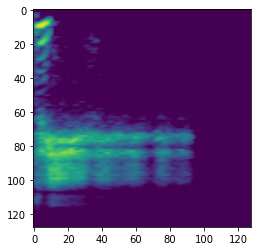

In [11]:
plt.figure()
plt.imshow(a[129])
plt.show()